In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# !pip install scikit-plot
from scikitplot.metrics import plot_roc

In [6]:
def plot_roc_curve(fp_r, tp_r):
    roc_auc = auc(fp_r, tp_r)
    plt.plot(fp_r, tp_r, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_model(m, X, y, three=False):
  y_pred = []
  y_prob = []
  for i in range(len(y)):
    X_test = X[i, :].reshape(1, -1)
    X_train = np.delete(X, i, axis=0)
    y_test = y[i]
    y_train = np.delete(y, i)
    m.fit(X_train, y_train)
    y_pred.append(m.predict(X_test))
    y_prob.append(m.predict_proba(X_test))
  y_prob = np.squeeze(y_prob)
  y_pred = np.squeeze(y_pred)
  print('Accuracy score: ' + str(accuracy_score(y, y_pred)))
  heatmap(confusion_matrix(y, y_pred), annot=True, fmt= 'd', cmap=plt.cm.Blues)
  plt.show()
  heatmap(confusion_matrix(y, y_pred, normalize='true'), annot=True, cmap=plt.cm.Blues)
  plt.show()
  plot_roc(y, y_prob)
  plt.show()


In [7]:
import os
import pandas as pd

root = '../'
df = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
df = df.loc[result.index.values]

df[df.columns[-1]].value_counts()

MCI        130
DEMENZA     62
NORMALI     30
MCI          1
Name: DGN1, dtype: int64

In [8]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

def label(s):
    if s == 'NORMALI':
        return 2
    if s == 'MCI':
        return 0
    if s == 'DEMENZA':
        return 1

X = df.iloc[:, 3:-1].to_numpy()
print(X.shape)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)
idx_2 = [y_3 != 2]
X = X[idx_2]
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
y_3 = y_3[idx_2]
print(np.bincount(y_3))

(223, 18)
[0 0 1 1 2 1 1 1 1 0 0 0 0 0 2 0 2 2 0 0 0 1 0 0 1 0 0 1 0 2 1 1 1 0 0 0 0
 0 0 2 2 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0
 2 0 0 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 2
 0 1 0 0 2 2 0 0 2 0 1 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 2 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 0 1 2 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 2]
[131  62]


C:\Users\aida\anaconda3\envs\rocf2_env\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\aida\anaconda3\envs\rocf2_env\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Fitting 193 folds for each of 90 candidates, totalling 17370 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 5440 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 8848 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 11428 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 13896 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 16256 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 17370 out of 17370 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 193 folds for each of 30 candidates, totalling 5790 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 5790 out of 5790 | elapsed:   21.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 193 folds for each of 150 candidates, totalling 28950 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 5936 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 9536 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 13936 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 19136 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 25136 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 28950 out of 28950 | elapsed:  1.2min finished


LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


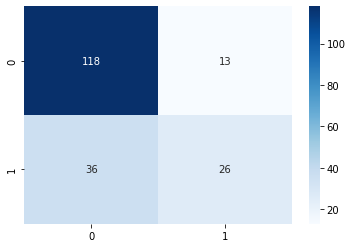

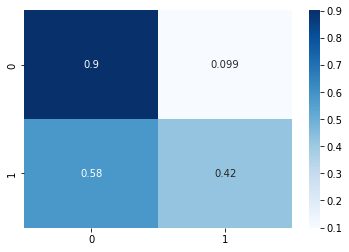

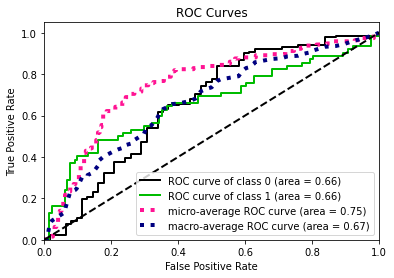

LOOCV score = 0.7357512953367875
Accuracy score: 0.7357512953367875


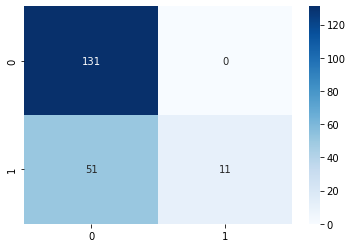

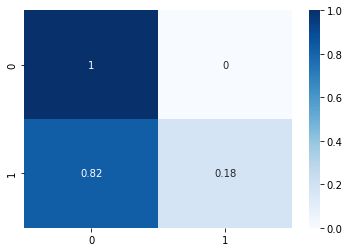

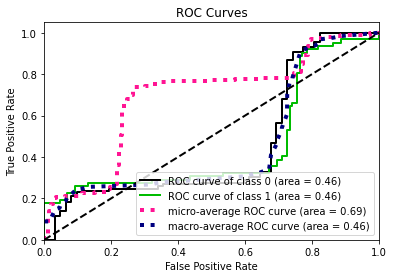

LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


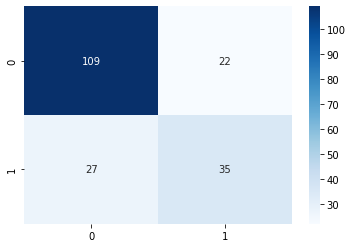

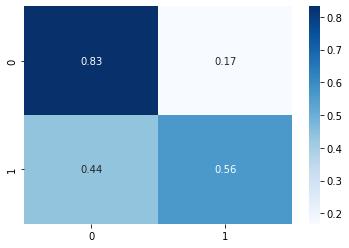

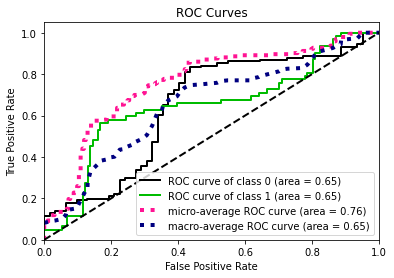

In [9]:
from seaborn import heatmap
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_curve, auc, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

In [11]:

import joblib
joblib.dump(sigm_poly.best_estimator_, '../new_models/svm_model_unbalanced_MCI_to_dementia.joblib')
joblib.dump(scaler, '../new_models/svm_scaler_unbalanced_MCI_to_dementia.joblib')

['../new_models/svm_scaler_unbalanced_MCI_to_dementia.joblib']

Accuracy: 0.663 (0.473)
Accuracy score: 0.6632124352331606


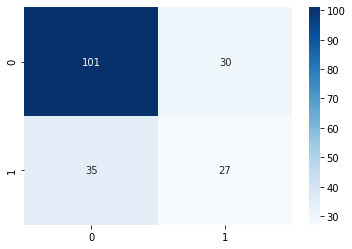

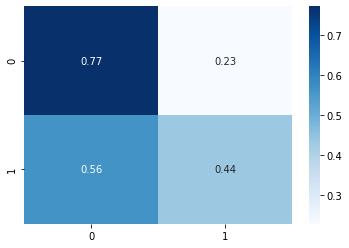

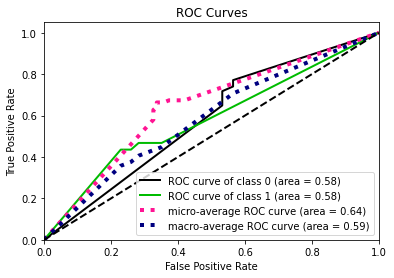

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 193 folds for each of 90 candidates, totalling 17370 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2884 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 6316 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 9976 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 11422 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14105 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 16893 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 17370 out of 17370 | elapsed:  4.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 30 candidates, totalling 5790 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 5790 out of 5790 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 150 candidates, totalling 28950 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 14300 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 19500 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 25500 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 28950 out of 28950 | elapsed:  5.1min finished


LOOCV score = 1.0
Accuracy score: 1.0


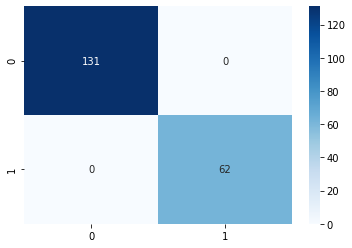

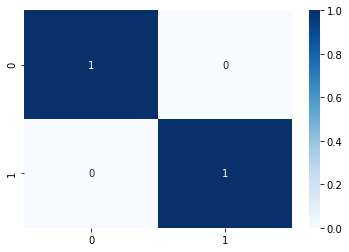

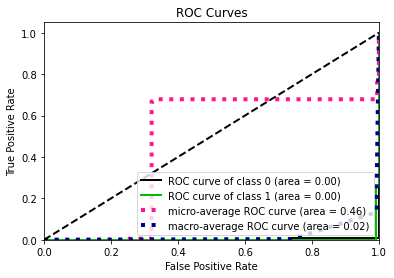

LOOCV score = 1.0
Accuracy score: 1.0


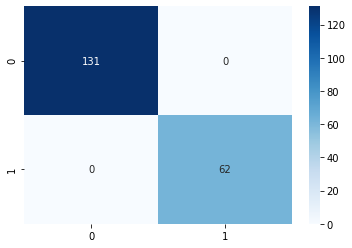

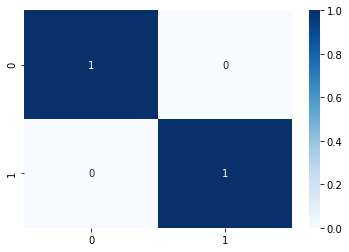

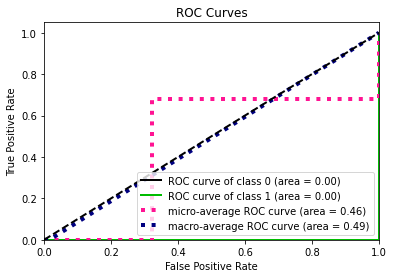

LOOCV score = 1.0
Accuracy score: 1.0


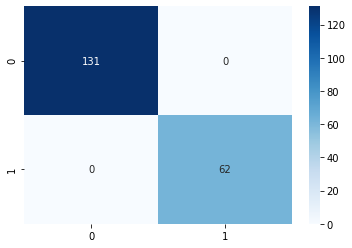

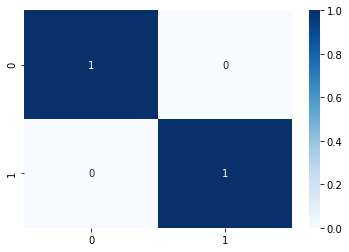

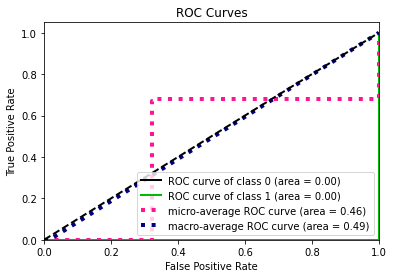

In [8]:
# HERE WE FOUND THE BEST RESULTS FOR CLASSIFYING MCI-DEMENTIA
# ALL 3 KERNELS PERFORM WELL, SO I CAN CHOOSE ANY
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

In [ ]:
import joblib
joblib.dump(svm_poly.best_estimator_, '../new_models/svm_model_MCI_to_dementia.joblib')
joblib.dump(scaler, '../new_models/svm_scaler_MCI_to_dementia.joblib')

Accuracy: 0.648 (0.478)
Accuracy score: 0.6476683937823834


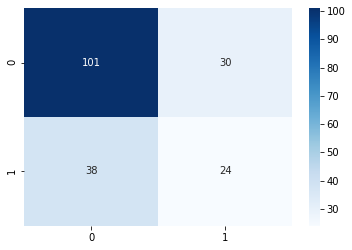

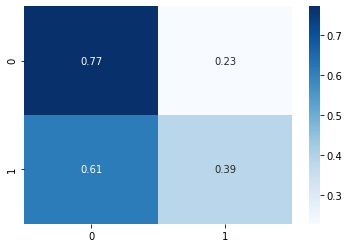

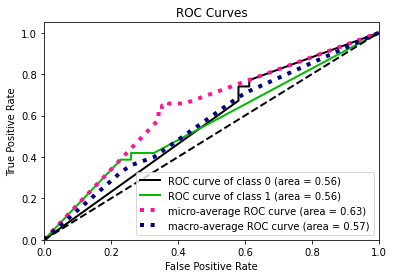

In [9]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

[0 0 1 1 2 1 1 1 1 0 0 0 0 0 2 0 2 2 0 0 0 1 0 0 1 0 0 1 0 2 1 1 1 0 0 0 0
 0 0 2 2 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0
 2 0 0 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 2
 0 1 0 0 2 2 0 0 2 0 1 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 2 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 0 1 2 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[131  62]
Fitting 193 folds for each of 90 candidates, totalling 17370 fits


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5288 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 8376 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 11370 

Fitting 193 folds for each of 30 candidates, totalling 5790 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2172 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 5790 out of 5790 | elapsed:   55.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 150 candidates, totalling 28950 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 4236 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 9836 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 17036 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 25836 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 28950 out of 28950 | elapsed:  3.8min finished


LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


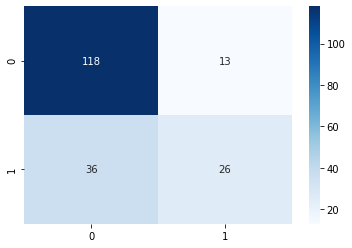

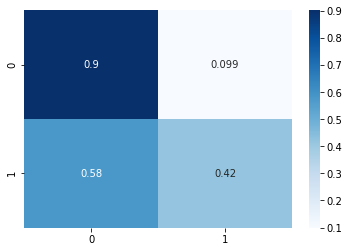

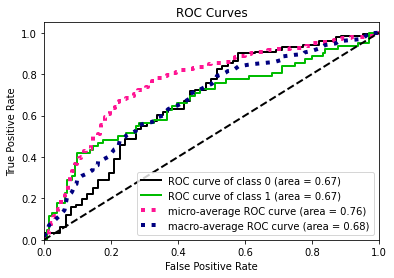

LOOCV score = 0.7357512953367875
Accuracy score: 0.7357512953367875


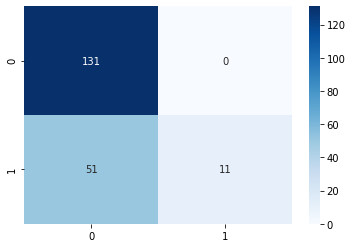

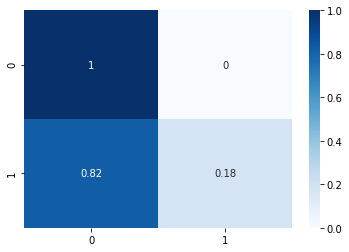

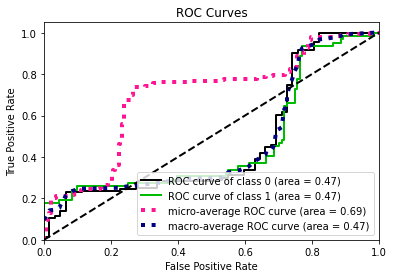

LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


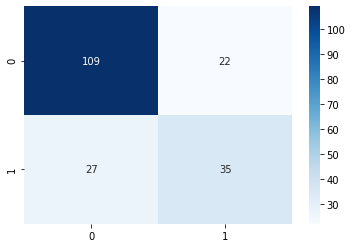

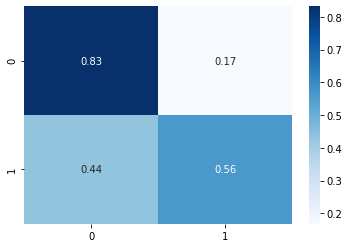

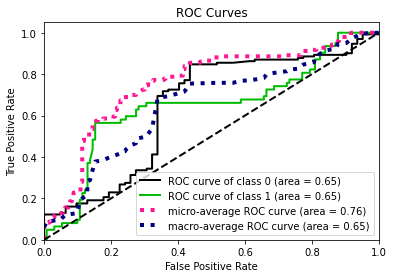

In [10]:
df = pd.read_csv(os.path.join(root, 'bilanciato_abbate_3.csv'), header=0, index_col=0)

X = df.iloc[:, :-1].to_numpy()

y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)
idx_2 = [y_3 != 2]
X = X[idx_2]
X_s = StandardScaler().fit_transform(X)
y_3 = y_3[idx_2]
print(np.bincount(y_3))

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.663 (0.473)
Accuracy score: 0.6632124352331606


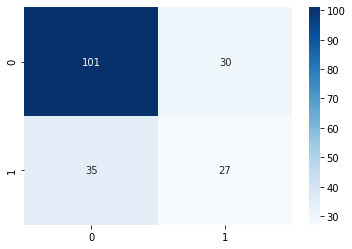

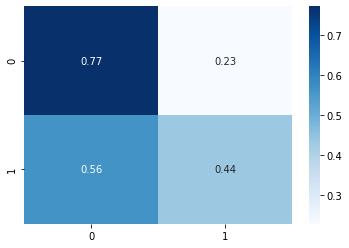

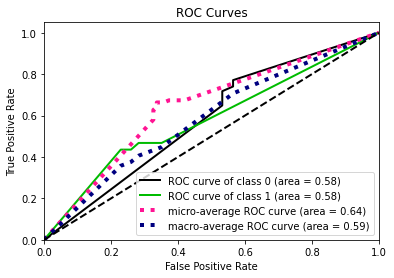

In [11]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [12]:
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
X = result.to_numpy()

print(X.shape)
y = df.loc[result.index.values, 'DGN1'].to_numpy()
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)
idx_2 = [y_3 != 2]
X = X[idx_2]
X_s = StandardScaler().fit_transform(X)
y_3 = y_3[idx_2]
print(np.bincount(y_3))

(223, 18)
[0 0 1 1 2 1 1 1 1 0 0 0 0 0 2 0 2 2 0 0 0 1 0 0 1 0 0 1 0 2 1 1 1 0 0 0 0
 0 0 2 2 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0
 2 0 0 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 2
 0 1 0 0 2 2 0 0 2 0 1 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 2 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 0 1 2 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 2]
[131  62]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Fitting 193 folds for each of 90 candidates, totalling 17370 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2884 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 6512 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 10384 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 13640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 17367 out of 17370 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 17370 out of 17370 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 30 candidates, totalling 5790 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2252 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 5790 out of 5790 | elapsed:   56.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 150 candidates, totalling 28950 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 4348 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 9948 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 17148 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 25948 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 28950 out of 28950 | elapsed:  3.9min finished


LOOCV score = 0.7564766839378239
Accuracy score: 0.7564766839378239


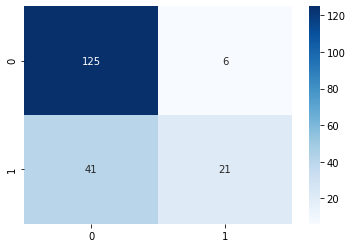

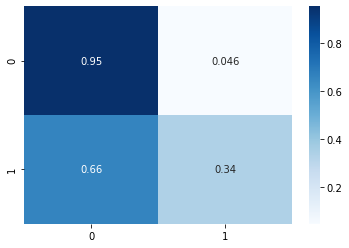

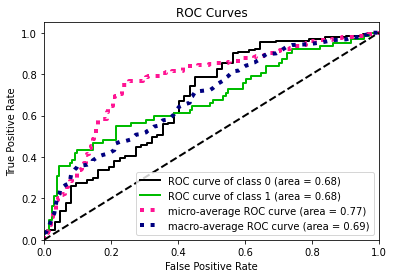

LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


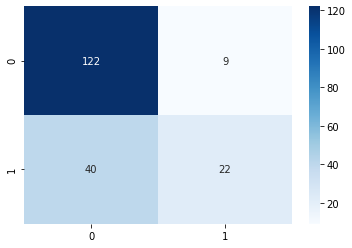

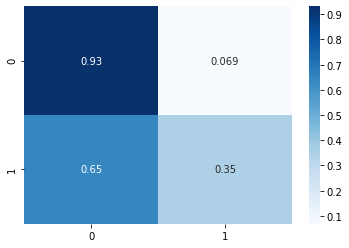

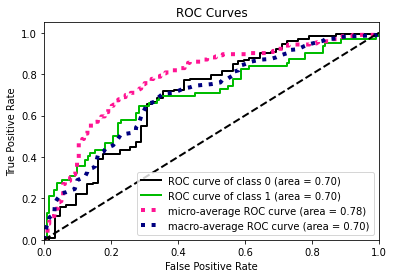

LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


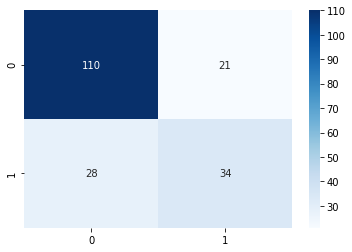

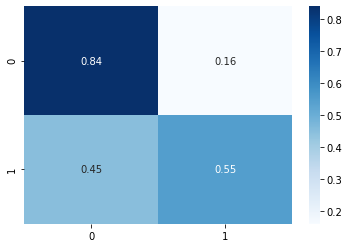

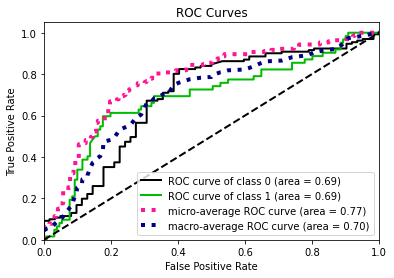

In [13]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.694 (0.461)
Accuracy score: 0.694300518134715


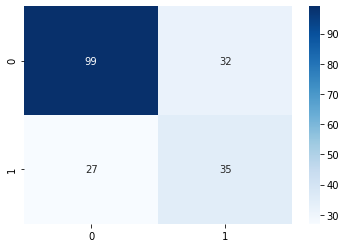

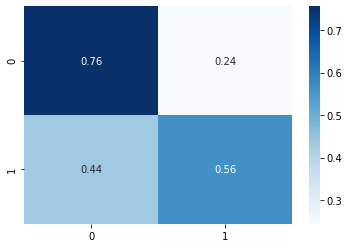

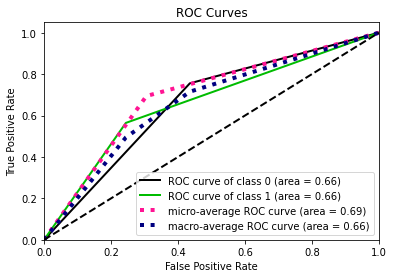

In [14]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 193 folds for each of 90 candidates, totalling 17370 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 10598 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 13672 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 17128 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 17370 out of 17370 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 30 candidates, totalling 5790 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 5790 out of 5790 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 150 candidates, totalling 28950 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 14300 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 19500 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 25500 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 28950 out of 28950 | elapsed:  5.2min finished


LOOCV score = 1.0
Accuracy score: 1.0


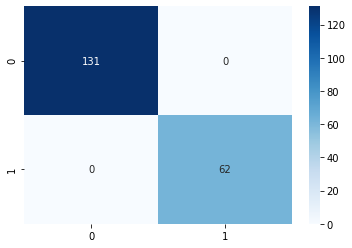

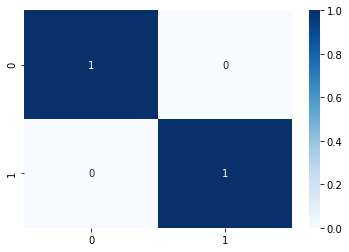

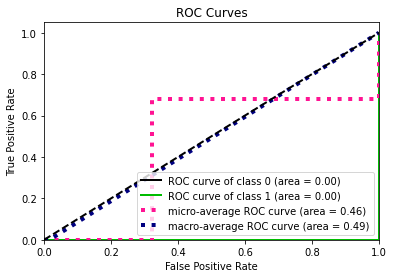

LOOCV score = 1.0
Accuracy score: 1.0


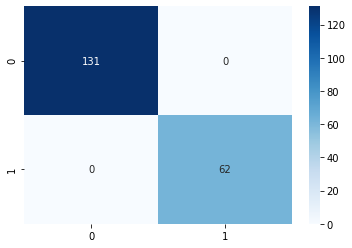

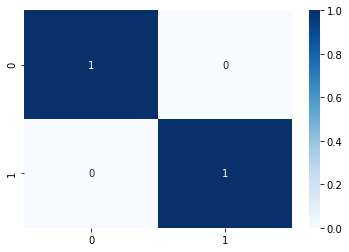

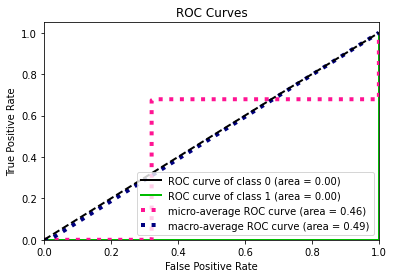

LOOCV score = 1.0
Accuracy score: 1.0


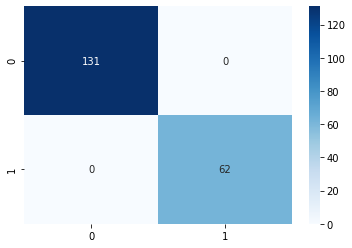

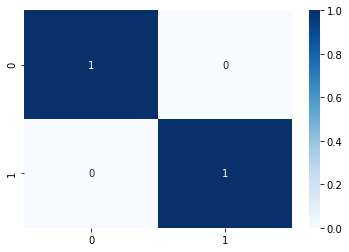

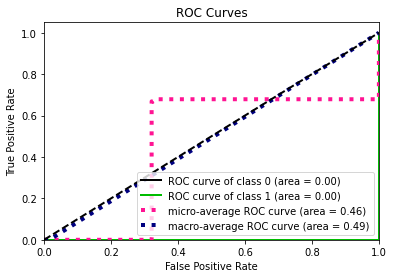

In [15]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.663 (0.473)
Accuracy score: 0.6632124352331606


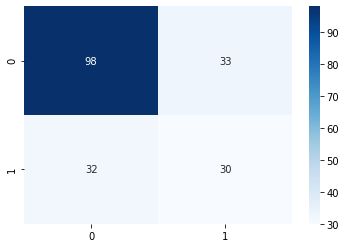

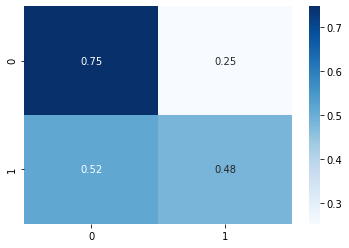

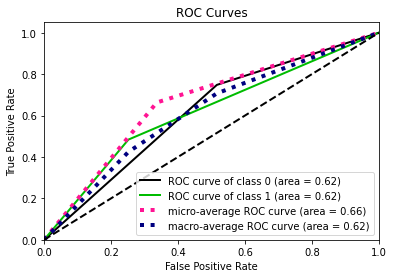

In [16]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

[0 0 1 1 2 1 1 1 1 0 0 0 0 0 2 0 2 2 0 0 0 1 0 0 1 0 0 1 0 2 1 1 1 0 0 0 0
 0 0 2 2 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0
 2 0 0 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 2
 0 1 0 0 2 2 0 0 2 0 1 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 2 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 0 1 2 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[131  62]
Fitting 193 folds for each of 90 candidates, totalling 17370 fits


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 8860 t

Fitting 193 folds for each of 30 candidates, totalling 5790 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2172 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 5790 out of 5790 | elapsed:   56.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 193 folds for each of 150 candidates, totalling 28950 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 4252 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 9852 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 17052 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 25852 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 28950 out of 28950 | elapsed:  3.9min finished


LOOCV score = 0.7564766839378239
Accuracy score: 0.7564766839378239


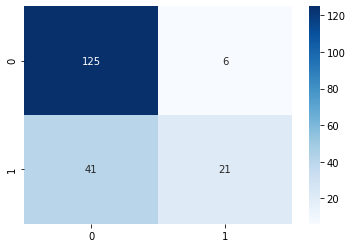

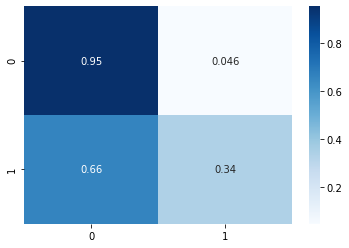

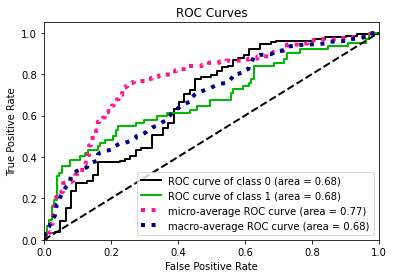

LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


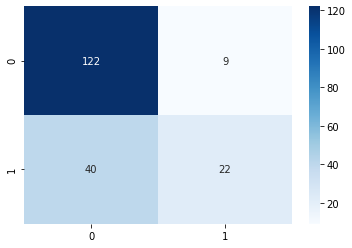

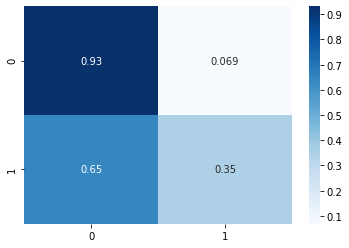

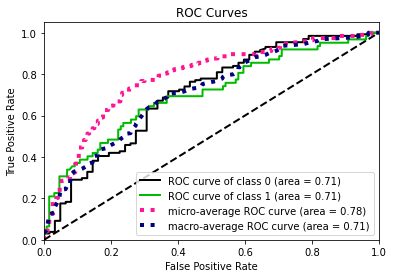

LOOCV score = 0.7461139896373057
Accuracy score: 0.7461139896373057


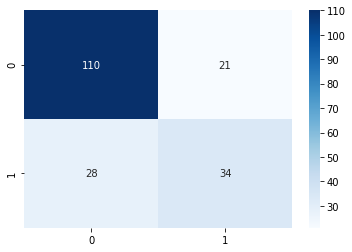

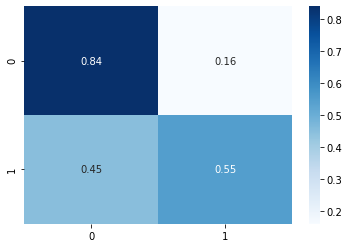

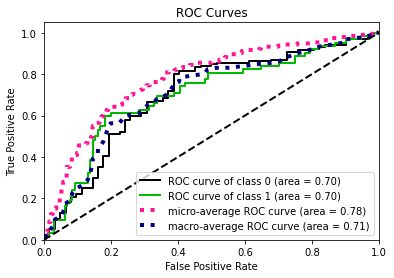

In [17]:
df = pd.read_csv(os.path.join(root, 'bilanciato_miei_3.csv'), header=0, index_col=0)

X = df.iloc[:, :-1].to_numpy()

y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)
idx_2 = [y_3 != 2]
X = X[idx_2]
X_s = StandardScaler().fit_transform(X)
y_3 = y_3[idx_2]
print(np.bincount(y_3))
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.694 (0.461)
Accuracy score: 0.694300518134715


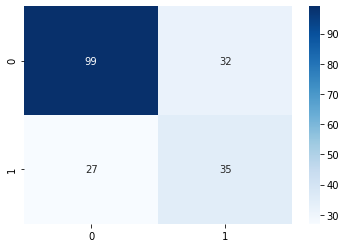

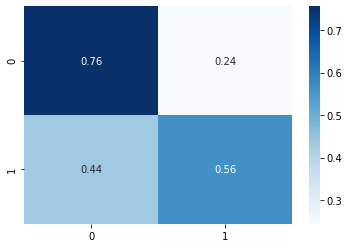

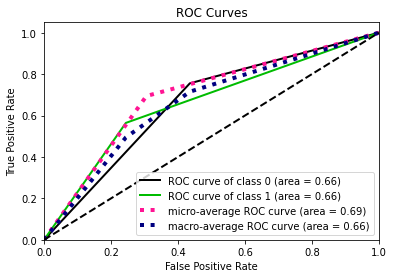

In [18]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)